In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Parse the data file to obtain the raw data

In [4]:
path = '/Users/ziegler/Desktop/'
file='return_loss_HW_dipole.csv'

raw_data={'f':[],'s11':{'mag':[],'phi':[]}}
#frequency_of_interest=26e9
with open(path+file) as infile:
    read=csv.reader(infile,delimiter=',')
    for row in read:
        print(row)
        try:
            if len(row)>0:
                raw_data['f'].append(float(row[0]))
                raw_data['s11']['mag'].append(float(row[1]))
                raw_data['s11']['phi'].append(float(row[2]))
                #raw_data['s31']['mag'].append(float(row[17]))
                #raw_data['s31']['phi'].append(float(row[18]))
                #raw_data['s41']['mag'].append(float(row[25]))
                #raw_data['s41']['phi'].append(float(row[26]))
                #if int(row[0])==int(frequency_of_interest):
                    
                #    raw_data.update({'s':[]})
                #    for n in row[1:]:
                #        raw_data['s'].append(float(n))
        except ValueError:
            continue

['!CSV A.01.01']
['!Keysight Technologies', 'N5222A', 'MY51422034', 'A.10.65.03']
['!Date: Wednesday', ' March 18', ' 2020 09:43:08']
['!Source: Standard']
[]
['BEGIN CH1_DATA']
['Freq(Hz)', 'S11(DB)', 'S11(DEG)']
['25900000000', '-21.063053', '-129.10313']
['25901000000', '-21.852016', '-134.11554']
['25902000000', '-22.687704', '-139.81119']
['25903000000', '-23.57066', '-146.379']
['25904000000', '-24.48555', '-154.09261']
['25905000000', '-25.390074', '-163.2075']
['25906000000', '-26.218573', '-173.93643']
['25907000000', '-26.866308', '173.66403']
['25908000000', '-27.220922', '159.85114']
['25909000000', '-27.185644', '145.63696']
['25910000000', '-26.76968', '131.99055']
['25911000000', '-26.07221', '119.76339']
['25912000000', '-25.218195', '109.2612']
['25913000000', '-24.290569', '100.35071']
['25914000000', '-23.36323', '92.835335']
['25915000000', '-22.47625', '86.344269']
['25916000000', '-21.630928', '80.701172']
['25917000000', '-20.840059', '75.729713']
['25918000000',

# Plot of the unwrapped phases of S21, S31, and S41

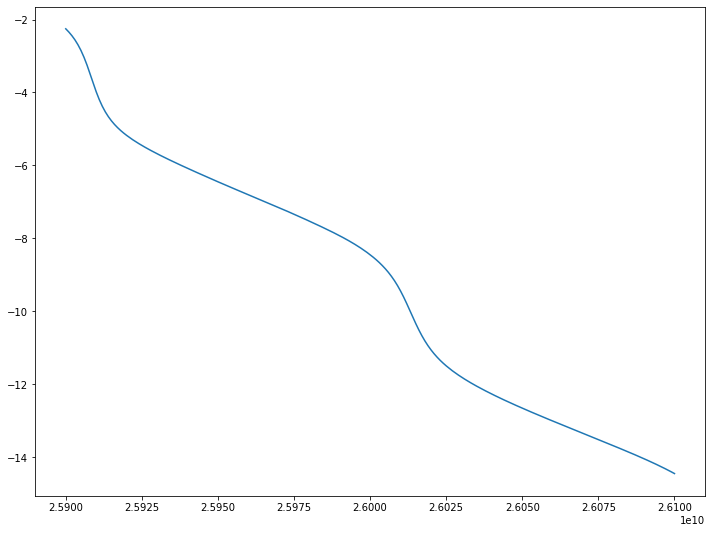

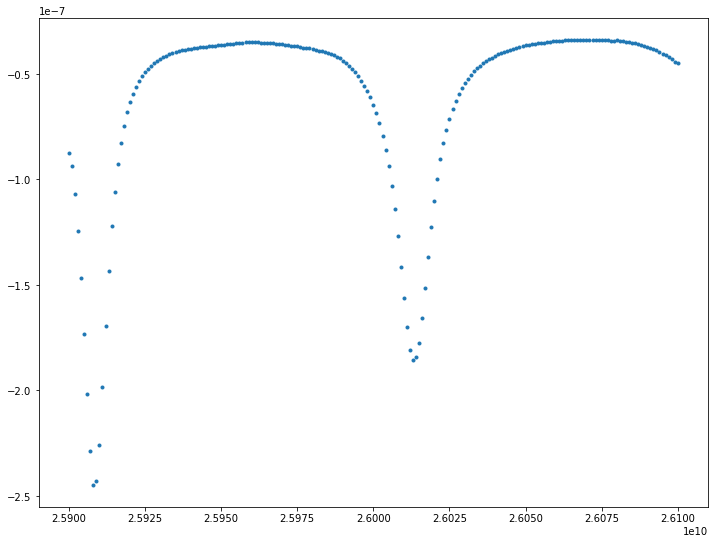

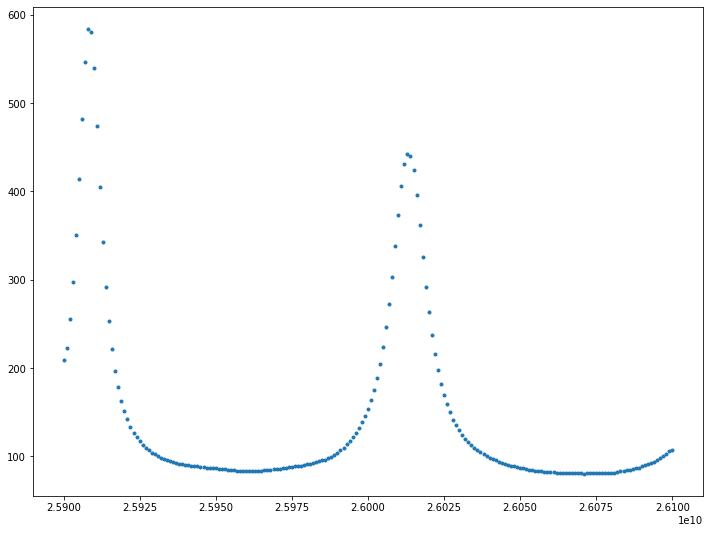

In [10]:
plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s11']['phi'])))
#plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s31']['phi'])))
#plt.plot(raw_data['f'],np.unwrap(np.radians(raw_data['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s11']['phi'])),raw_data['f']),'.')
#plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s31']['phi'])),raw_data['f']),'.')
#plt.plot(raw_data['f'],np.gradient(np.unwrap(np.radians(raw_data['s41']['phi'])),raw_data['f']),'.')

length=-np.gradient(np.unwrap(np.radians(raw_data['s11']['phi'])),raw_data['f'])*3e10/(2*np.pi*2) # in cm
#r3=np.mean(np.gradient(np.unwrap(np.radians(raw_data['s31']['phi'])),raw_data['f']))*3e10/(2*np.pi)
#r4=np.mean(np.gradient(np.unwrap(np.radians(raw_data['s41']['phi'])),raw_data['f']))*3e10/(2*np.pi)

#print(r2,r3,r4)
plt.figure(figsize=(12,9))
plt.plot(raw_data['f'],length,'.')

# Zero pad frequencies before the starting frequency in the raw data

In [46]:
pad_data={'f':[],'s21':{'mag':[],'phi':[]},'s31':{'mag':[],'phi':[]},'s41':{'mag':[],'phi':[]}}
for i,k in enumerate(raw_data):
    if i==0:
        pad_data['f']=np.append(np.arange(0,raw_data['f'][0],raw_data['f'][1]-raw_data['f'][0]),raw_data['f'])
        print(k)
    else:
        for j,l in enumerate(raw_data[k]):
            print(k,l)
            pad_data[k][l]=np.append(np.zeros(len(np.arange(0,raw_data['f'][0],raw_data['f'][1]-raw_data['f'][0])))
                                     ,raw_data[k][l])



f
s21 mag
s21 phi
s31 mag
s31 phi
s41 mag
s41 phi


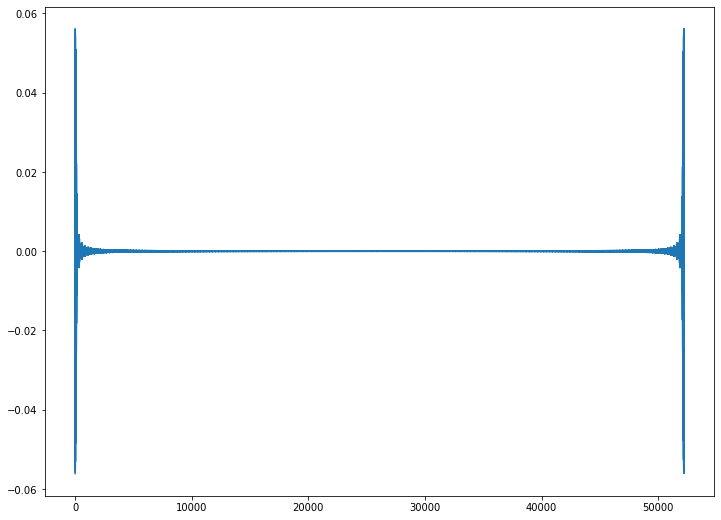

In [50]:
#plt.figure(figsize=(12,9))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s21']['phi'])))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s31']['phi'])))
#plt.plot(pad_data['f'],np.unwrap(np.radians(pad_data['s41']['phi'])))

plt.figure(figsize=(12,9))
plt.plot(np.fft.irfft(np.unwrap(np.radians(pad_data['s21']['phi']))))

In [36]:
raw_data['f'][0]

25900000000.0